# Predicting Vehicle MSRP using Multiple Regression Analysis
#### By: Connor Schultz and Aiden Bull

### 1. Introduction

Intro goes here.



### 2. Data
Data section goes here.


### 3. Analysis Methods
Methods intro goes here.

#### 3.1. Data Preprocessing
Data Preproc goes here.

In [26]:
#Import required python3 packages
import os
import numpy as np
import pandas as pd
import nbinteract as nbi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [14]:
#Read data in from processed .csv file
#Processed using data_cleaner.py
cwd = os.getcwd()
data = pd.read_csv(cwd+"/car_data/proc_cars.csv")
data = data.drop(columns = ['Unnamed: 0'])

In [15]:
#Prepare data for regression analysis
y = data['MSRP']
X = data.drop(columns = ['MSRP'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#### 3.2. Least Squares Linear Regression
Linear regression goes here.

In [21]:
#Model Fitting
lin = LinearRegression().fit(X_train, y_train)
#Prediction
lin_errors = []
for i in range(0, X_test.shape[0]):
    x_i = lin.predict([X_test.iloc[i, :]])  
    y_i = y_test.iloc[i]
    e = abs(x_i - y_i) / y_i
    lin_errors.append(e)


#### 3.3. Ridge Regression
Ridge regression goes here.

In [ ]:
#Model Fitting
ridge = Ridge().fit(X_train, y_train)
#Prediction
ridge_errors = []
for i in range(0, X_test.shape[0]):
    x_i = lin.predict([X_test.iloc[i, :]])
    y_i = y_test.iloc[i]
    e = abs(x_i - y_i) / y_i
    ridge_errors.append(e)

#### 3.4. Lasso Regression
lasso regression goes here.

In [ ]:
#Model Fitting
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
#Prediction
lasso_errors = []
for i in range(0, X_test.shape[0]):
    x_i = lin.predict([X_test.iloc[i, :]])
    y_i = y_test.iloc[i]
    e = abs(x_i - y_i) / y_i
    ridge_errors.append(e)

### 3. Results and Discussion

In [23]:
#Errors and Accuracy
errors = lin_errors
print("Maximum error: %f" % (np.max(errors)))
print("Minimum error: %f" % (np.min(errors)))
print("Mean error: %f" % (np.mean(errors)))


Maximum error: 5.899862
Minimum error: 0.000086
Mean error: 0.203998


In [18]:
#Coefficient values
model = lin
print("Maximum coefficient value: %f" % (np.max(model.coef_)))
print("Minimum coefficient value: %f" % (np.min(model.coef_)))
print("Mean coefficient value: %f" % (np.mean(model.coef_)))


Maximum coefficient value: 184386.171339
Minimum coefficient value: -56921.178284
Mean coefficient value: 3333.876771


Hist test


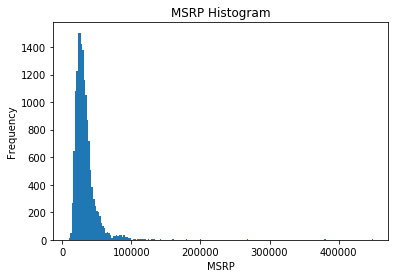

In [125]:
plt.hist(y,bins = 1000)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('MSRP Histogram');


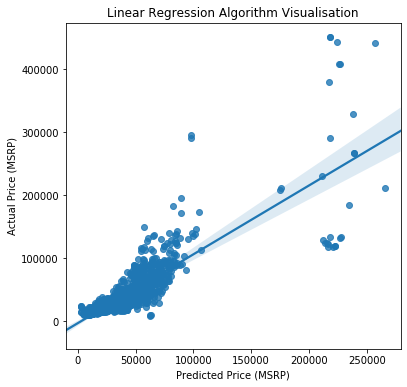

In [31]:
model = lin

plt.figure(figsize= (6, 6))
plt.title('Linear Regression Algorithm Visualisation')
sns.regplot(model.predict(X_test), y_test)
plt.xlabel("Predicted Price (MSRP)")
plt.ylabel("Actual Price (MSRP)")
plt.show()
